### COMP SCI 524

### Homework 6

### Q1

let $r$ be the raduis of the smallesr circle to contain all the points.

let (a,b) be the center of the circle above.

let $X$ be the set of randomly generated points.

model:

\begin{equation*}
\begin{aligned}
& \underset{a,b,r}{\text{min}}
& & r \\
& \text{s.t.}
& & (X_{1,i}-a)^{2}+(X_{2,i}-b)^{2} \leq r^{2}
\end{aligned}
\end{equation*}

In [13]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
# suppress Gurobi output
set_optimizer_attribute(m, "OutputFlag", 0);

@variable(m, r)
@variable(m, a)
@variable(m, b)

for i in 1:50
    @constraint(m, [r; (X[1,i]-a); (X[2,i]-b)] in SecondOrderCone())
end

@objective(m, Min, r);

optimize!(m)
println(termination_status(m))

┌ Info: Precompiling Gurobi [2e9cd046-0924-5485-92f1-d5272153d98b]
└ @ Base loading.jl:1278
ERROR: LoadError:     Gurobi not properly installed. Please run Pkg.build("Gurobi"). For
    more information go to https://github.com/JuliaOpt/Gurobi.jl

Stacktrace:
 [1] error(::String) at ./error.jl:33
 [2] top-level scope at /Users/wanjingde/.julia/packages/Gurobi/VhpiN/src/Gurobi.jl:7
 [3] include(::Function, ::Module, ::String) at ./Base.jl:380
 [4] include(::Module, ::String) at ./Base.jl:368
 [5] top-level scope at none:2
 [6] eval at ./boot.jl:331 [inlined]
 [7] eval(::Expr) at ./client.jl:467
 [8] top-level scope at ./none:3
in expression starting at /Users/wanjingde/.julia/packages/Gurobi/VhpiN/src/Gurobi.jl:4


LoadError: [91mFailed to precompile Gurobi [2e9cd046-0924-5485-92f1-d5272153d98b] to /Users/wanjingde/.julia/compiled/v1.5/Gurobi/do9v6_gIyoJ.ji.[39m

In [ ]:
x1 = JuMP.value.(a)
x2 = JuMP.value.(b)
r1 = JuMP.objective_value(m)

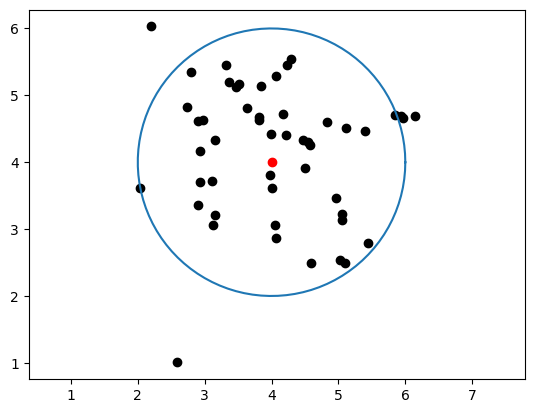

(1.7935416330332739, 6.357777840874226, 0.75466379419765, 6.280418191176377)

In [3]:
using PyPlot
X = 4 .+ randn(2,50) # generate 50 random points
t = range(0,stop=2*3.141592654,length=100) # parameter that traverses the circle
# r1 = 2; x1 = 4; x2 = 4 # radius and coordinates of the center

plot( x1 .+ r1*cos.(t), x2 .+ r1*sin.(t)) # plot circle radius r with center (x1,x2)
scatter( X[1,:], X[2,:], color="black") # plot the 50 points
scatter(x1, x2, color = "red")
axis("equal") # make x and y scales equal

### Q3

#### (a)

see handwrittings.

#### (b)

In [9]:
using LinearAlgebra

Q = [2 4 -3; 4 2 -3; -3 -3 9]

# use eigvals() to get the eigenvalues of a matrix
(Lambda, U) = eigen(Q)
Lambda

3-element Array{Float64,1}:
 -1.9999999999999996
  3.000000000000001
 12.0

One eigenvalue of Q = -1.999 so Q is not positive definite. $v^{T}Qv$ is not a ellipsoid.

#### (c)

In [10]:
U * diagm(Lambda) * U'
diagm(Lambda)

3×3 Array{Float64,2}:
 -2.0  0.0   0.0
  0.0  3.0   0.0
  0.0  0.0  12.0

Then see the handwriting above.